In [1]:
import pickle
import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'BERTtiny'),
  Text(1, 0, 'BERTmini'),
  Text(2, 0, 'BERTsmall'),
  Text(3, 0, 'BERTmedium'),
  Text(4, 0, 'BERTbase'),
  Text(5, 0, 'BERTlarge'),
  Text(6, 0, 'BERTlarge_mask'),
  Text(7, 0, 'DistillBERT')])

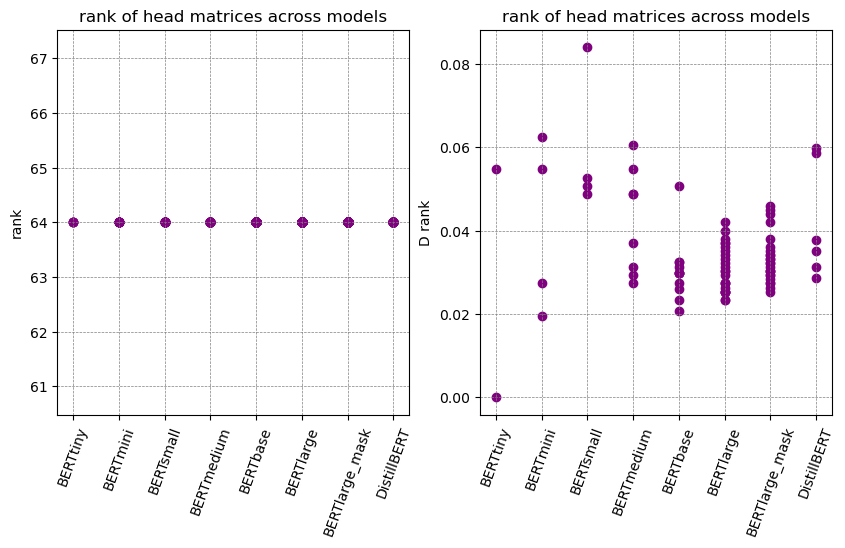

In [32]:
"""
Visualization of the ranks
"""

with open('../data/fig_ranks/models.pkl', 'rb') as file:
    models = pickle.load(file)

HeadsRank = [models[key][-1] for key in list(models.keys())]
FullRank = [models[key][-2] for key in list(models.keys())]
names = list(models.keys())

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

for i, model in enumerate(HeadsRank):
    plt.scatter(i*np.ones(HeadsRank[i].size),HeadsRank[i].flatten(),color='purple')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('rank of head matrices across models')
plt.ylabel('rank')
plt.xticks(np.arange(len(names)),names)
plt.xticks(rotation=70)

plt.subplot(1,2,2)

for i, model in enumerate(HeadsRank):
    plt.scatter(i*np.ones(FullRank[i].size),(HeadsRank[i].sum(axis=1) - FullRank[i])/HeadsRank[i].sum(axis=1),color='purple')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('rank of head matrices across models')
plt.ylabel('D rank')
plt.xticks(np.arange(len(names)),names)
plt.xticks(rotation=70)

In [26]:
HeadsRank[0].sum(axis=1) - FullRank[0]

array([0., 7.])